1 Data type constraints.mp4

## Numeric data or ... ?

In this exercise, and throughout this chapter, you'll be working with bicycle ride sharing data in San Francisco called ride_sharing. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The user_type column contains information on whether a user is taking a free ride and takes on the following values:

1 for free riders.
2 for pay per ride.
3 for monthly subscribers.
In this instance, you will print the information of ride_sharing using .info() and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset. The pandas package is imported as pd.

Instructions 1/3
- Print the information of ride_sharing.
- Use .describe() to print the summary statistics of the user_type column from ride_sharing.

In [2]:
import pandas as pd

In [3]:
ride_sharing = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Cleaning Data in Python/ride_sharing_new.csv')
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [4]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB


In [5]:
ride_sharing.describe()

,Unnamed: 0,station_A_id,station_B_id,bike_id,user_type,user_birth_year
count,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000
mean,12879.500000,31.023602,89.558579,4107.621467,2.008385,1983.054969
std,7436.415803,26.409263,105.144103,1576.315767,0.704541,10.010992
min,0.000000,3.000000,3.000000,11.000000,1.000000,1901.000000
25%,6439.750000,15.000000,21.000000,3106.000000,2.000000,1978.000000
50%,12879.500000,21.000000,58.000000,4821.000000,2.000000,1985.000000
75%,19319.250000,67.000000,93.000000,5257.000000,3.000000,1990.000000
max,25759.000000,81.000000,383.000000,6638.000000,3.000000,2001.000000


In [6]:
ride_sharing['user_type'].describe()

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

### Question

By looking at the summary statistics - they don't really seem to offer much description on how users are distributed along their purchase type, why do you think that is?

Possible Answers
- The user_type column is not of the correct type, it should be converted to str.
- The user_type column has an infinite set of possible values, it should be converted to category.
- The user_type column has an finite set of possible values that represent groupings of data, it should be converted to category.+

- Convert user_type into categorical by assigning it the 'category' data type and store it in the user_type_cat column.
- Make sure you converted user_type_cat correctly by using an assert statement.

In [7]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


Awesome work! Take a look at the new summary statistics, it seems that most users are pay per ride users!

In [8]:
assert 6-4 == 2

In [9]:
assert 6-4 == 1

AssertionError: 

## Summing strings and concatenating numbers

In the previous exercise, you were able to identify that category is the correct data type for user_type and convert it in order to extract relevant statistical summaries that shed light on the distribution of user_type.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column duration to the type int. Before that however, you will need to make sure to strip "minutes" from the column in order to make sure pandas reads it as numerical. The pandas package has been imported as pd.

Instructions
- Use the .strip() method to strip duration of "minutes" and store it in the duration_trim column.
- Convert duration_trim to int and store it in the duration_time column.
- Write an assert statement that checks if duration_time's data type is now an int.
- Print the average ride duration.

In [11]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip(' minutes')
#print(ride_sharing['duration_trim'][:5])

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')
#print(ride_sharing['duration_time'][:5])

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing[['duration','duration_trim','duration_time']].dtypes)
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes            12             12
1      24 minutes            24             24
2       8 minutes             8              8
3       4 minutes             4              4
4      11 minutes            11             11
...           ...           ...            ...
25755  11 minutes            11             11
25756  10 minutes            10             10
25757  14 minutes            14             14
25758  14 minutes            14             14
25759  29 minutes            29             29

[25760 rows x 3 columns]
duration         object
duration_trim    object
duration_time     int64
dtype: object
11.389052795031056


Great work! 11 minutes is really not bad for an average ride duration in a city like San-Francisco. In the next lesson, you're going to jump right ahead into sanity checking the range of values in your data.

2 Data range constraints.mp4

## Tire size constraints

In this lesson, you're going to build on top of the work you've been doing with the ride_sharing DataFrame. You'll be working with the tire_sizes column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

Instructions
100 XP
- Convert the tire_sizes column from category to 'int'.
- Use .loc[] to set all values of tire_sizes above 27 to 27.
- Reconvert back tire_sizes to 'category' from int.
- Print the description of the tire_sizes.

In [ ]:
print(ride_sharing.head())
# duration  station_A_id                                     station_A_name  station_B_id                   station_B_name  bike_id   user_type  user_birth_year user_gender tire_sizes
# 0  12 minutes            81                                 Berry St at 4th St           323               Broadway at Kearny     5480  Subscriber             1959        Male       27.0
# 1  24 minutes             3       Powell St BART Station (Market St at 4th St)           118  Eureka Valley Recreation Center     5193  Subscriber             1965        Male       26.0


In [ ]:
print(ride_sharing.dtypes)
# duration             object
# station_A_id          int64
# station_A_name       object
# station_B_id          int64
# station_B_name       object
# bike_id               int64
# user_type            objec nt
# user_birth_year       int64
# user_gender          object
# tire_sizes         category

In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

# count     25760
# unique        2
# top          27
# freq      13274
# Name: tire_sizes, dtype: int64

Awesome work! You can look at the new maximum by looking at the top row in the description. Notice how essential it was to convert tire_sizes into integer before setting a new maximum.

## Back to the future

A new update to the data pipeline feeding into the ride_sharing DataFrame has been updated to register each ride's date. This information is stored in the ride_date column of the type object, which represents strings in pandas.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the ride_date column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert ride_date to a datetime object.

The datetime package has been imported as dt, alongside all the packages you've been using till now.

Instructions
- Convert ride_date to a datetime object using to_datetime(), then convert the datetime object into a date and store it in ride_dt column.
- Create the variable today, which stores today's date by using the dt.date.today() function.
- For all instances of ride_dt in the future, set them to today's date.
- Print the maximum date in the ride_dt column.

In [ ]:
print(ride_sharing.head())
#     duration  station_A_id                                     station_A_name  station_B_id                   station_B_name  ...   user_type user_birth_year  user_gender tire_sizes   ride_date
#0  12 minutes            81                                 Berry St at 4th St           323               Broadway at Kearny  ...  Subscriber            1959         Male       27.0  2020-01-19
#1  24 minutes             3       Powell St BART Station (Market St at 4th St)           118  Eureka Valley Recreation Center  ...  Subscriber            1965         Male       26.0  2018-10-24
print(ride_sharing.dtypes)
# duration             object
# station_A_id          int64
# station_A_name       object
# station_B_id          int64
# station_B_name       object
# bike_id               int64
# user_type            object
# user_birth_year       int64
# user_gender          object
# tire_sizes         category
# ride_date            object
# dtype: object

In [ ]:
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

Great job! Imagine counting the number of rides taken today without having cleaned your ranges correctly. You would have wildly underreported your findings!

3 Uniqueness constraints.mp4

## How big is your subset?

You have the following loans DataFrame which contains loan and credit score data for consumers, and some metadata such as their first and last names. You want to find both complete and incomplete duplicates using .duplicated().

first_name	last_name	credit_score	has_loan
Justin	Saddlemeyer	600	1
Hadrien	Lacroix	450	0
Choose the correct usage of .duplicated() below:


Answer the question
50XP
Possible Answers

- loans.duplicated() 
  
Because the default method returns both complete and incomplete duplicates.
- loans.duplicated(subset = 'first_name') 

Because constraining the duplicate rows to the first name lets me find incomplete duplicates as well.
- loans.duplicated(subset = ['first_name', 'last_name'], keep = False) +
  
Because subsetting on consumer metadata and not discarding any duplicate returns all duplicated rows.
- loans.duplicated(subset = ['first_name', 'last_name'], keep = 'first')

Because this drops all duplicates.

Correct! Subsetting on metadata and keeping all duplicate records gives you a better bird-eye's view over your data and how to duplicate it! You can even subset the loans DataFrame using bracketing and sort the values so you can properly identify the duplicates.

## Finding duplicates

A new update to the data pipeline feeding into ride_sharing has added the ride_id column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of ride_sharing is in your environment, as well as all the packages you've been working with thus far.

Instructions
- Find duplicated rows of ride_id in the ride_sharing DataFrame while setting keep to False.
- Subset ride_sharing on duplicates and sort by ride_id and assign the results to duplicated_rides.
- Print the ride_id, duration and user_birth_year columns of duplicated_rides in that order.

In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset=['ride_id'], keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by='ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

#     ride_id  duration  user_birth_year
# 22       33        10             1979
# 39       33         2             1979
# 53       55         9             1985
# 65       55         9             1985
# 74       71        11             1997
# 75       71        11             1997
# 76       89         9             1986
# 77       89         9             2060

Great job! Notice that rides 33 and 89 are incomplete duplicates, whereas the remaining are complete. You'll learn how to treat them in the next exercise!

## Treating duplicates

In the last exercise, you were able to verify that the new update feeding into ride_sharing contains a bug generating both complete and incomplete duplicated rows for some values of the ride_id column, with occasional discrepant values for the user_birth_year and duration columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average duration, and the minimum user_birth_year for each set of incomplete duplicate rows.

Instructions
- Drop complete duplicates in ride_sharing and store the results in ride_dup.
- Create the statistics dictionary which holds minimum aggregation for user_birth_year and mean aggregation for duration.
- Drop incomplete duplicates by grouping by ride_id and applying the aggregation in statistics.
- Find duplicates again and run the assert statement to verify de-duplication.

In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0   

4 Membership constraints.mp4

## Finding consistency

In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.

Instructions 1/4
- Print the categories DataFrame and take a close look at all possible correct categories of the survey columns.
- Print the unique values of the survey columns in airlines using the .unique() method.

In [22]:
airlines = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Cleaning Data in Python/airlines_final.csv')
airlines['cleanliness'] = airlines['cleanliness'].astype('category')
airlines['safety'] = airlines['safety'].astype('category')
airlines['satisfaction'] = airlines['satisfaction'].astype('category')
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [18]:
categories = pd.DataFrame({'cleanliness': ['Clean','Average','Somewhat clean','Somewhat dirty','Dirty'],
                           'safety': ['Neutral','Very safe','Somewhat safe','Very unsafe','Somewhat unsafe'],
                           'satisfaction': ['Very satisfied','Neutral','Somewhat satisfied','Somewhat unsatisfied','Very unsatisfied']
                          })
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [19]:
set(airlines['safety'])

{'Neutral', 'Somewhat safe', 'Somewhat unsafe', 'Very safe', 'Very unsafe'}

In [20]:
airlines['safety'].unique()

array(['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe',
       'Somewhat unsafe'], dtype=object)

In [24]:
# AK: dataset is different from the lab!!!
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

# AK: from the lab
# Cleanliness:  ['Clean', 'Average', 'Unacceptable', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
# Categories (6, object): ['Average', 'Clean', 'Dirty', 'Somewhat clean', 'Somewhat dirty', 'Unacceptable'] 
# Safety:  ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
# Categories (5, object): ['Neutral', 'Somewhat safe', 'Somewhat unsafe', 'Very safe', 'Very unsafe'] 
# Satisfaction:  ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
# Categories (5, object): ['Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very satisfied', 'Very unsatisfied'] 

print(airlines.dtypes)

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
Categories (5, object): ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'] 

Safety:  ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
Categories (5, object): ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied', 'Neutral', 'Somewhat satsified', 'Somewhat unsatisfied', 'Very unsatisfied']
Categories (5, object): ['Very satisfied', 'Neutral', 'Somewhat satsified', 'Somewhat unsatisfied', 'Very unsatisfied'] 

Unnamed: 0          int64
id                  int64
day           

## Finding consistency

In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.

Instructions 2/4

Take a look at the output. Out of the cleanliness, safety and satisfaction columns, which one has an inconsistent category and what is it?

Possible Answers

- cleanliness because it has an Unacceptable category.+
- cleanliness because it has a Terribly dirty category.
- satisfaction because it has a Very satisfied category.


- Create a set out of the cleanliness column in airlines using set() and find the inconsistent category by finding the difference in the cleanliness column of categories.
- Find rows of airlines with a cleanliness value not in categories and print the output.

In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])
print(cat_clean)
# {'Unacceptable'}

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)
print(cat_clean_rows.head())
# 0    False
# 1    False
# 2    False
# 3    False
# 4    True
# Name: cleanliness, dtype: bool

# Print rows with inconsistent category
print(airlines[cat_clean_rows])
#        id        day           airline  destination  dest_region dest_size boarding_area   dept_time  wait_min   cleanliness         safety        satisfaction
# 4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe  Somewhat satisfied
# 18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub  Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe  Somewhat satisfied
# 100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe  Somewhat satisfied

- Print the rows with the consistent categories of cleanliness only.

In [ ]:
# Print rows with consistent categories only
print(airlines[~cat_clean_rows].head())
#            id       day        airline        destination    dest_region dest_size boarding_area   dept_time  wait_min     cleanliness         safety        satisfaction
#    0     1351   Tuesday    UNITED INTL             KANSAI           Asia       Hub  Gates 91-102  2018-12-31     115.0           Clean        Neutral      Very satisfied
#    1      373    Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico     Small   Gates 50-59  2018-12-31     135.0           Clean      Very safe      Very satisfied
#    2     2820  Thursday          DELTA        LOS ANGELES        West US       Hub   Gates 40-48  2018-12-31      70.0         Average  Somewhat safe             Neutral
#    3     1157   Tuesday      SOUTHWEST        LOS ANGELES        West US       Hub   Gates 20-39  2018-12-31     190.0           Clean      Very safe  Somewhat satisfied
#    5      634  Thursday         ALASKA             NEWARK        East US       Hub   Gates 50-59  2018-12-31     140.0  Somewhat clean      Very safe      Very satisfied
 

Great _consistent_ work! Keep it up! In the next lesson, we'll be looking at more in depth solutions to dealing with dirty categorical data.

5 Categorical variables.mp4

## Inconsistent categories

In this exercise, you'll be revisiting the airlines DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, dest_region and dest_size respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the airlines DataFrame is in your environment.

Instructions 1/4
- Print the unique values in dest_region and dest_size respectively.

In [25]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


### Question

From looking at the output, what do you think is the problem with these columns?

Possible Answers
- The dest_region column has only inconsistent values due to capitalization.
- The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.
- The dest_size column has only inconsistent values due to leading and trailing spaces.
- Both 2 and 3 are correct.+

- Change the capitalization of all values of dest_region to lowercase.
- Replace the 'eur' with 'europe' in dest_region using the .replace() method.

In [27]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
print(airlines['dest_region'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


- Strip white spaces from the dest_size column using the .strip() method.
- Verify that the changes have been into effect by printing the unique values of the columns using .unique() .

In [28]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


Great work! Notice how all categories have been properly treated?

## Remapping categories

To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.
The pandas and numpy packages have been imported as pd and np. Let's create some new categorical data!

Instructions
- Create the ranges and labels for the wait_type column mentioned in the description.
- Create the wait_type column by from wait_min by using pd.cut(), while inputting label_ranges and label_names in the correct arguments.
- Create the mapping dictionary mapping weekdays to 'weekday' and weekend days to 'weekend'.
- Create the day_week column by using .replace().

In [31]:
import numpy as np

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

#print(airlines.head())

airlines.groupby(by=['day_week','wait_type'])['id'].count().unstack(level=1)

wait_type,short,medium,long
day_week,,,
weekday,74,1389,537
weekend,7,322,148


In [33]:
airlines.groupby(by='day_week').agg({'wait_min':'mean'})

,wait_min
day_week,
weekday,164.40550
weekend,173.12369


In [38]:
airlines.groupby(by=['day_week','wait_type']).agg({'wait_min':['mean','std','count']}).unstack(level=1)

wait_min                                                \
                mean                                std              
wait_type     short       medium      long       short      medium   
day_week                                                             
weekday    48.878378  123.624190  285.810056  14.223223  31.215988   
weekend    51.142857  131.900621  268.581081  13.569925  31.329861   

                                            
                       count                
wait_type      long   short  medium long    
day_week                                    
weekday    148.437777     74   1389    537  
weekend    115.305274      7    322    148

Awesome work! You just created two new categorical variables, that when combined with other columns, could produce really interesting analysis. Don't forget, you can always use an assert statement to check your changes passed.

6 Cleaning text data.mp4

## Removing titles and taking names

While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

Your ultimate objective is to create two new columns named first_name and last_name, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The airlines DataFrame is in your environment, alongside pandas as pd.

Instructions
- Remove "Dr.", "Mr.", "Miss" and "Ms." from full_name by replacing them with an empty string "" in that order.
- Run the assert statement using .str.contains() that tests whether full_name still contains any of the honorifics.

In [46]:
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday


In [ ]:
# AK: from the lab
airlines.head()
# Out[1]:
#      id                full_name        day      airline        destination  ...   dept_time wait_min     cleanliness         safety        satisfaction
# 0  1351           Melodie Stuart    Tuesday  UNITED INTL             KANSAI  ...  2018-12-31    115.0           Clean        Neutral      Very satisfied
# 1   373          Dominic Shannon     Friday       ALASKA  SAN JOSE DEL CABO  ...  2018-12-31    135.0           Clean      Very safe      Very satisfied
# 2  2820        Quintessa Tillman   Thursday        DELTA        LOS ANGELES  ...  2018-12-31     70.0         Average  Somewhat safe             Neutral
# 3  1157  Dr. Christine Nicholson    Tuesday    SOUTHWEST        LOS ANGELES  ...  2018-12-31    190.0           Clean      Very safe  Somewhat satsified
# 4  2992          Regina Clements  Wednesday     AMERICAN              MIAMI  ...  2018-12-31    559.0  Somewhat clean      Very safe  Somewhat satsified


In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

In [45]:
ar = ['as','df','tg','gb','rt']
ar_df = pd.DataFrame({'c':ar})
print(ar_df['c'].str.contains('d'))
print(ar_df['c'].str.contains('d').any())

0    False
1     True
2    False
3    False
4    False
Name: c, dtype: bool
True


Great work! By normalizing full names this way, you can now easily split them into first names and last names!

## Keeping it descriptive

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.

The airlines DataFrame is in your environment, and pandas is imported as pd.

Instructions
- Using the airlines DataFrame, store the length of each instance in the survey_response column in resp_length by using .str.len().
- Isolate the rows of airlines with resp_length higher than 40.
- Assert that the smallest survey_response length in airlines_survey is now bigger than 40

In [ ]:
# airlines.head()
# Out[1]:
#      id        day      airline        destination    dest_region  ... wait_min cleanliness       safety      satisfaction           survey_response
# 0  1351    Tuesday  UNITED INTL             KANSAI           Asia  ...    115.0       Dirty  Very unsafe  Very unsatisfied           It was terrible
# 1   373     Friday       ALASKA  SAN JOSE DEL CABO  Canada/Mexico  ...    135.0       Dirty  Very unsafe  Very unsatisfied  I didn't like the flight
# 2  2820   Thursday        DELTA        LOS ANGELES        West US  ...     70.0       Dirty  Very unsafe  Very unsatisfied              I hate this 
# 3  1157    Tuesday    SOUTHWEST        LOS ANGELES        West US  ...    190.0       Dirty  Very unsafe  Very unsatisfied                 Not a fan
# 4  2992  Wednesday     AMERICAN              MIAMI        East US  ...    559.0       Dirty  Very unsafe  Very unsatisfied                       Bad


In [ ]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()
print(airlines['survey_response'][:5], resp_length[:5])
# 0             It was terrible
# 1    I didn't like the flight
# 2                I hate this 
# 3                   Not a fan
# 4                         Bad
# Name: survey_response, dtype: object 0    15
# 1    24
# 2    12
# 3     9
# 4     3

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])
# Name: survey_response, dtype: int64
# 18    The airport personnell forgot to alert us of d...
# 19    The food in the airport was really really expe...
# 20    One of the other travelers was really loud and...
# 21    I don't remember answering the survey with the...
# 22    The airport personnel kept ignoring my request...


Phenomenal work! These types of feedbacks are essential to improving any service. Coupled with some wordcount analysis, you can find common patterns across all survey responses in no time!

7 Uniformity.mp4

## Ambiguous dates
You have a DataFrame containing a subscription_date column that was collected from various sources with different Date formats such as YYYY-mm-dd and YYYY-dd-mm. What is the best way to unify the formats for ambiguous values such as 2019-04-07?

Answer the question

Possible Answers

- Set them to NA and drop them.
- Infer the format of the data in question by checking the format of subsequent and previous values.

Incorrect. That's definitely a possibility, but it's best to understand your data better before treating it.

- Infer the format from the original data source.

Incorrect. Really close! But what if you have erroneous values like 2019-28-21? It's best to always gain a clearer picture of the dynamics affecting your data.

- All of the above are possible, as long as we investigate where our data comes from, and understand the dynamics affecting it before cleaning it. +

Great work! Like most cleaning data tasks, ambiguous dates require a thorough understanding of where your data comes from. Diagnosing problems is the first step in finding the best solution!

## Uniform currencies

In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

Instructions
- Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
- Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
- Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.

In [49]:
banking = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Cleaning Data in Python/banking_dirty.csv')
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [58]:
banking['acct_amount_qcut'] = pd.qcut(x=banking['acct_amount'],q=[0,0.25,0.5,0.75,1])
banking[['acct_amount','acct_amount_qcut']].head()

,acct_amount,acct_amount_qcut
0,63523.31,"(59218.13, 83344.165]"
1,38175.46,"(12209.839, 59218.13]"
2,59863.77,"(59218.13, 83344.165]"
3,84132.10,"(83344.165, 95097.47]"
4,120512.00,"(95097.47, 173743123.55]"


In [59]:
np.percentile(a=banking['acct_amount'],q=[0,25,50,75,100])


array([1.22098400e+04, 5.92181300e+04, 8.33441650e+04, 9.50974700e+04,
       1.73743124e+08])

In [ ]:
# AK: dataset in the lab is different
banking.head()
# Out[1]:
#     cust_id  acct_amount acct_cur  inv_amount account_opened last_transaction
# 0  8C35540A     44244.71   dollar    35500.50       03-05-18         30-09-19
# 1  D5536652     86506.85   dollar    81921.86       21-01-18         14-01-19
# 2  A631984D     77799.33   dollar    46412.27       26-01-18         06-10-19
# 3  93F2F951     93875.24     euro    76563.35       21-08-17         10-07-19
# 4  DE0A0882     99998.35     euro    18669.01       05-06-17         15-01-19

In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

Crafty currency conversion! With just a few lines of code, you made this column ready for analysis!

## Uniform dates

After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.

Instructions 1/4
- Print the header of account_opened from the banking DataFrame and take a look at the different results.

In [ ]:
print(banking['account_opened'].head())
# 0          2018-03-05
# 1            21-01-18
# 2    January 26, 2018
# 3            21-14-17
# 4            05-06-17
# Name: account_opened, dtype: object

In [ ]:
# Convert account_opened to datetime
banking['account_opened_1'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')
print(banking[['account_opened', 'account_opened_1']].head()) 
#      account_opened account_opened_1
# 0        2018-03-05       2018-03-05
# 1          21-01-18       2018-01-21
# 2  January 26, 2018       2018-01-26
# 3          21-14-17              NaT
# 4          05-06-17       2017-05-06

- Extract the year from the amended account_opened column and assign it to the acct_year column.
- Print the newly created acct_year column.

In [ ]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking[['account_opened','acct_year']])

#    account_opened acct_year
# 0      2018-03-05      2018
# 1      2018-01-21      2018
# 2      2018-01-26      2018
# 3             NaT       NaN
# 4      2017-05-06      2017


Cunning calendar cleaning! Now that the acct_year column is created, a simple .groupby() will show you how accounts are opened on a yearly!

8 Cross field validation.mp4

## How's our data integrity?

New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

Instructions 1/2
- Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.
- Store the values of banking with consistent inv_amount in consistent_inv, and those with inconsistent ones in inconsistent_inv.
- Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
- Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.

In [ ]:
banking.head()
#     cust_id birth_date  age  acct_amount  inv_amount  ...   fund_B   fund_C   fund_D  account_opened last_transaction
# 0  870A9281 1962-06-09   61     63523.31       51295  ...   4138.0   1420.0  15632.0        02-09-18         22-02-19
# 1  166B05B0 1962-12-16   61     38175.46       15050  ...    938.0   6696.0   2421.0        28-02-19         31-10-18
# 2  BFC13E88 1990-09-12   33     59863.77       24567  ...   4590.0   8469.0   1185.0        25-04-18         02-04-18
# 3  F2158F66 1985-11-03   38     84132.10       23712  ...    492.0   6482.0  12830.0        07-11-17         08-11-18


In [ ]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])
# Number of inconsistent investments:  8

In [ ]:
print(inconsistent_inv[['fund_A', 'fund_B', 'fund_C', 'fund_D','inv_amount']])
# Number of inconsistent investments:  8
#       fund_A    fund_B    fund_C    fund_D  inv_amount
# 4   12158.40  51281.00  13434.00  18383.00       93230
# 12  18314.00   1477.00  29049.48   5539.00       50812
# 22   8206.00  15019.00   5559.60   6182.00       33927
# 43    314.00   6072.28  14163.00   7908.00       27531
# 47  33764.00   5042.00  10659.00  19237.41       66796
# 65  28615.00  21720.05  11906.00  10763.00       70171
# 89   8489.36  28592.00   2439.00  30419.00       68466
# 92   6467.00  20861.00   9861.00  26004.16       60407

In [ ]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year


# Find rows where age column == ages_manual
age_equ = banking['age'] == ages_manual


# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])
# Number of inconsistent ages:  4

assert inconsistent_ages.shape[0] == 0

print(inconsistent_ages)
#      cust_id birth_date  age  acct_amount  inv_amount  ...   fund_B    fund_C   fund_D  account_opened last_transaction
# 4   7A73F334 1990-05-17   39    120512.00       93230  ...  51281.0  13434.00  18383.0        14-05-18         19-07-18
# 6   6B094617 1977-08-26   52     89855.98       34549  ...    312.0  20610.00  11831.0        06-02-18         14-02-19
# 12  EEBD980F 1990-11-20   39     57838.49       50812  ...   1477.0  29049.48   5539.0        08-12-18         04-01-20
# 42  E7389E60 1989-01-13   40     86028.48       48085  ...  10608.0  26502.00   5244.0        04-06-17         07-08-18


Awesome work! There are only 8 and 4 rows affected by inconsistent inv_amount and age values, respectively. In this case, it's best to investigate the underlying data sources before deciding on a course of action!

9 Completenes.mp4

## Is this missing at random?
You've seen in the video exercise how there are a variety of missingness types when observing missing data. As a reminder, missingness types can be described as the following:

- Missing Completely at Random: No systematic relationship between a column's missing values and other or own values.
- Missing at Random: There is a systematic relationship between a column's missing values and other observed values.
- Missing not at Random: There is a systematic relationship between a column's missing values and unobserved values.

You have a DataFrame containing customer satisfaction scores for a service. What type of missingness is the following? 

A customer satisfaction_score column with missing values for highly dissatisfied customers.

Answer the question

Possible Answers

- Missing completely at random.

Incorrect. Hmm not really, there's obviously an underlying mechanism behind the missingness of the data.

- Missing at random.

Incorrect. Are you sure about that one? This would be more applicable if missing satisfaction_score values were due to values in another column of the DataFrame.

- Missing not at random +

Awesome work! This is a clear example of missing not at random, where low values of satisfaction_score are missing because of inherently low satisfaction!

## Missing investors

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

Instructions 1/4
- Print the number of missing values by column in the banking DataFrame.
- Plot and show the missingness matrix of banking with the msno.matrix() function.


In [61]:
import missingno as msno

# Print number of missing values in banking
print(banking.isna().sum())
# cust_id              0
# age                  0
# acct_amount          0
# inv_amount          13
# account_opened       0
# last_transaction     0
# dtype: int64

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

ModuleNotFoundError: No module named 'missingno'

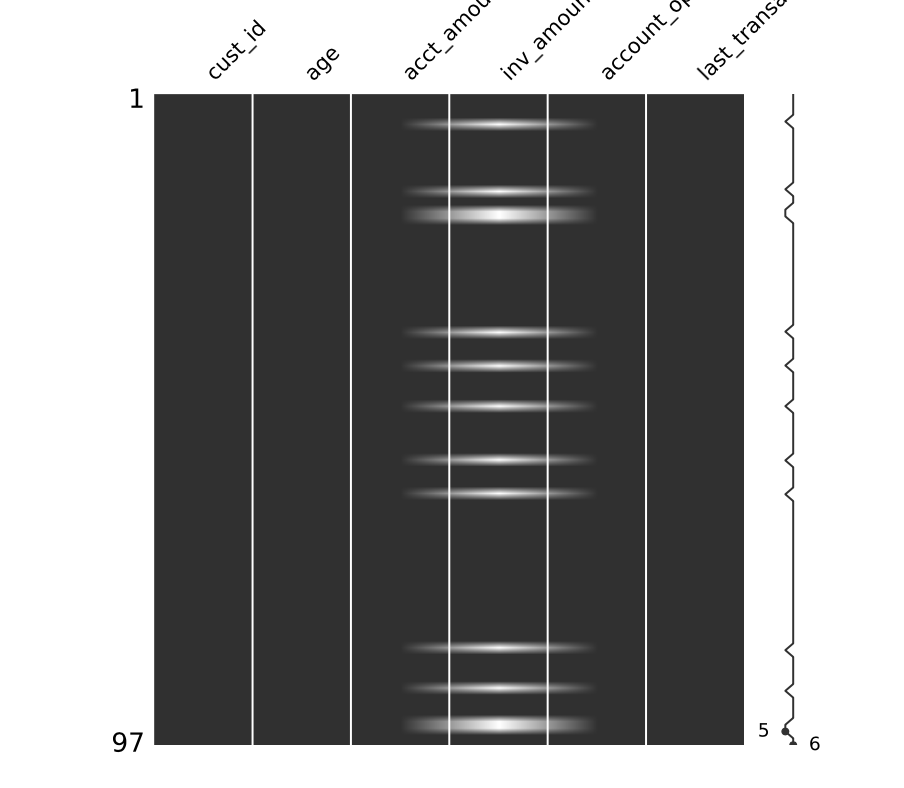

- Isolate the values of banking missing values of inv_amount into missing_investors and with non-missing inv_amount values into investors.

In [ ]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

print(missing_investors)
# dtype: int64
#      cust_id  age  acct_amount  inv_amount account_opened last_transaction
# 4   DE0A0882   21     99998.35         NaN       05-06-17         15-01-19
# 14  E7389E60   22     86028.48         NaN       04-06-17         07-08-18
# 17  D3287768   20     89961.77         NaN       03-09-18         19-10-18
# 18  FA01676F   21     66947.30         NaN       10-08-18         23-07-19
# 35  904A19DD   20     31981.36         NaN       28-01-19         23-06-19
# 40  93E78DA3   22     41942.23         NaN       09-10-17         15-04-18
# 46  3B240FEF   25     97856.46         NaN       23-05-18         11-10-18
# 54  6B094617   21     89855.98         NaN       06-02-18         14-02-19
# 59  56D310A8   21     88660.40         NaN       25-02-18         29-07-18
# 82  078C654F   21     87312.64         NaN       14-04-17         05-08-18
# 88  33CA2B76   23     75508.61         NaN       16-11-17         03-03-19
# 93  4C7F8638   23     21942.37         NaN       14-07-18         02-02-19
# 94  A81D31B3   24     74010.15         NaN       02-06-18         12-09-18

### Question

Now that you've isolated banking into investors and missing_investors, use the .describe() method on both of these DataFrames in the IPython shell to understand whether there are structural differences between them. What do you think is going on?

Possible Answers
- The data is missing completely at random and there are no drivers behind the missingness.
- The inv_amount is missing only for young customers, since the average age in missing_investors is 22 and the maximum age is 25.+
- The inv_amount is missing only for old customers, since the average age in missing_investors is 42 and the maximum age is 59.

In [ ]:
investors.describe()

#           age  acct_amount  inv_amount
# count  84.000       84.000      84.000
# mean   43.560    75095.273   44717.885
# std    10.411    32414.506   26031.246
# min    26.000    12209.840    3216.720
# 25%    34.000    57373.062   22736.037
# 50%    45.000    83061.845   44498.460
# 75%    53.000    94165.965   66176.803
# max    59.000   250046.760   93552.690

missing_investors.describe()

#           age  acct_amount  inv_amount
# count  13.000       13.000         0.0
# mean   21.846    73231.238         NaN
# std     1.519    25553.327         NaN
# min    20.000    21942.370         NaN
# 25%    21.000    66947.300         NaN
# 50%    21.000    86028.480         NaN
# 75%    23.000    89855.980         NaN
# max    25.000    99998.350         NaN

- Sort the banking DataFrame by the age column and plot the missingness matrix of banking_sorted.

In [ ]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='age')
msno.matrix(banking_sorted)
plt.show()

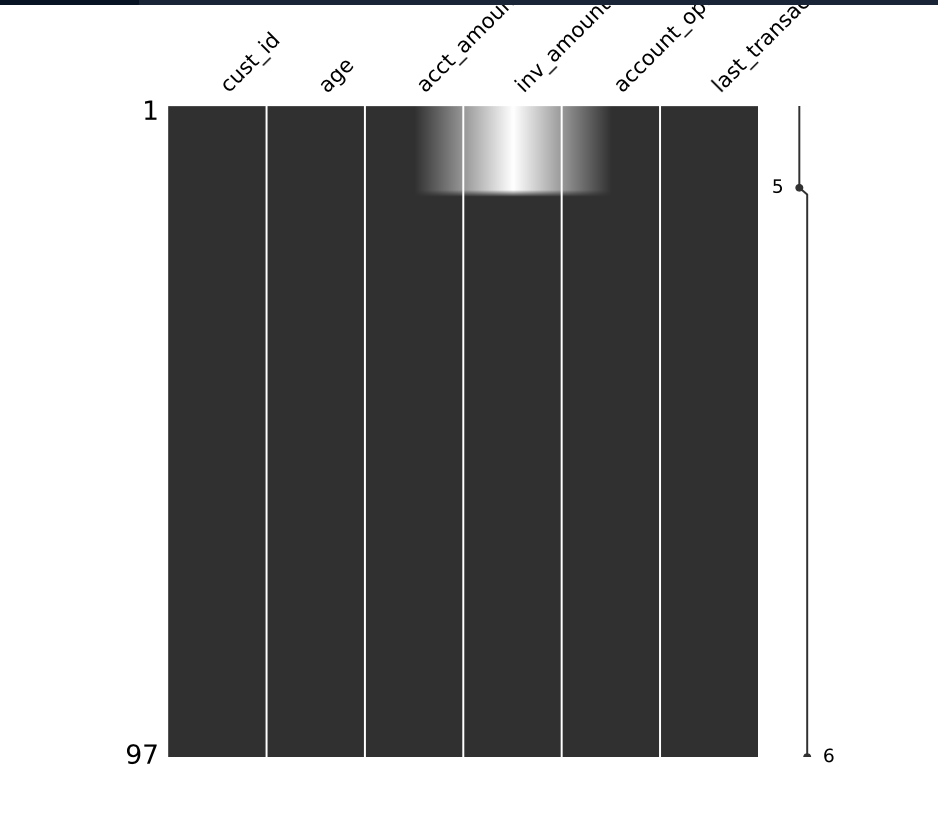

Great job! Notice how all the white spaces for inv_amount are on top? Indeed missing values are only due to young bank account holders not investing their money! Better set it to 0 with .fillna().

## Follow the money

In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.

Instructions
- Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.
- Use inv_amount to compute the estimated account amounts for banking_fullid by setting the amounts equal to inv_amount * 5, and assign the results to acct_imp.
- Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna().

In [ ]:
print(banking.head())
#     cust_id  acct_amount  inv_amount account_opened last_transaction
# 0  8C35540A     44244.71    35500.50       03-05-18         30-09-19
# 1  D5536652          NaN    81921.86       21-01-18         14-01-19
# 2  A631984D          NaN    46412.27       26-01-18         06-10-19
# 3  93F2F951          NaN    76563.35       21-08-17         10-07-19
# 4  DE0A0882          NaN    18669.01       05-06-17         15-01-19

In [ ]:
print(banking['cust_id'].isna().sum())
# 9
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])
print(banking_fullid['cust_id'].isna().sum())
# 0

# Compute estimated acct_amount
acct_imp = banking['inv_amount'] * 5

print('--1\n',banking_fullid['acct_amount'].isna().sum())
# --1
#  14
# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})
print('--2\n',banking_imputed['acct_amount'].isna().sum())
# --2
#   0

# Print number of missing values
print(banking_imputed.isna().sum())
# cust_id             0
# acct_amount         0
# inv_amount          0
# account_opened      0
# last_transaction    0
# dtype: int64

Awesome work! As you can see no missing data left, you can definitely _bank_ on getting your analysis right!

10 Comparing strings.mp4

## Minimum edit distance
In the video exercise, you saw how minimum edit distance is used to identify how similar two strings are. As a reminder, minimum edit distance is the minimum number of steps needed to reach from String A to String B, with the operations available being:

- Insertion of a new character.
- Deletion of an existing character.
- Substitution of an existing character.
- Transposition of two existing consecutive characters.

What is the minimum edit distance from 'sign' to 'sing', and which operation(s) gets you there?

Answer the question

Possible Answers

- 2 by substituting 'g' with 'n' and 'n' with 'g'.

Incorrect. That's not really correct - do you think this is the minimum edit distance?

- 1 by transposing 'g' with 'n'.+

Correct! Transposing the last two letters of 'sign' is the easiest way to get to 'sing' - in the next exercise, you'll use edit distance at scale to remap categories!

- 1 by substituting 'g' with 'n'.

Incorrect. That's the correct edit distance, but substituting g with n would take you from 'sign' to 'sinn'.

- 2 by deleting 'g' and inserting a new 'g' at the end.

Incorrect. That's not really correct - do you think this is the minimum edit distance?


## The cutoff point

In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of restaurants has been collected from many sources, where the cuisine_type column is riddled with typos, and should contain only italian, american and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the thefuzz's process.extract() function by finding the similarity score of the most distant typo of each category.

Instructions 1/2
- Import process from thefuzz.
- Store the unique cuisine_types into unique_types.
- Calculate the similarity of 'asian', 'american', and 'italian' to all possible cuisine_types using process.extract(), while returning all possible matches.

In [ ]:
restaurants.head()
#                     rest_name                  rest_addr         city       phone cuisine_type
# 0  arnie morton  s of chicago   435 s. la cienega blv .   los angeles  3102461501      america
# 1         art  s delicatessen       12224 ventura blvd.   studio city  8187621221      merican
# 2                   campanile       624 s. la brea ave.   los angeles  2139381447     amurican
# 3                       fenix    8358 sunset blvd. west     hollywood  2138486677     americen
# 4          grill on the alley           9560 dayton way   los angeles  3102760615    americann

In [ ]:
# Import process from thefuzz
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()
print(unique_types)
# ['america' 'merican' 'amurican' 'americen' 'americann' 'asiane' 'itali'
# 'asiann' 'murican' 'italien' 'italian' 'asiat' 'american' 'americano'
# 'italiann' 'ameerican' 'asianne' 'italiano' 'americin' 'ammericann'
# 'amerycan' 'aamerican' 'ameriican' 'italiaan' 'asiian' 'asiaan'
# 'amerrican' 'ameerrican' 'ammereican' 'asian' 'italianne' 'italiian'
# 'itallian']
    
# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))
# [('asian', 100), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italian', 67), ('amurican', 62), ('american', 62), ('italiaan', 62), ('italiian', 62), ('itallian', 62), ('americann', 57), ('americano', 57), ('ameerican', 57), ('aamerican', 57), ('ameriican', 57), ('amerrican', 57), ('ammericann', 54), ('ameerrican', 54), ('ammereican', 54), ('america', 50), ('merican', 50), ('murican', 50), ('italien', 50), ('americen', 46), ('americin', 46), ('amerycan', 46), ('itali', 40)]

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit=len(unique_types)))
# [('american', 100), ('americann', 94), ('americano', 94), ('ameerican', 94), ('aamerican', 94), ('ameriican', 94), ('amerrican', 94), ('america', 93), ('merican', 93), ('ammericann', 89), ('ameerrican', 89), ('ammereican', 89), ('amurican', 88), ('americen', 88), ('americin', 88), ('amerycan', 88), ('murican', 80), ('asian', 62), ('asiane', 57), ('asiann', 57), ('asiian', 57), ('asiaan', 57), ('italian', 53), ('asianne', 53), ('italiann', 50), ('italiano', 50), ('italiaan', 50), ('italiian', 50), ('itallian', 50), ('italianne', 47), ('asiat', 46), ('itali', 40), ('italien', 40)]

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian',unique_types,limit=len(unique_types)))
# [('italian', 100), ('italiann', 93), ('italiano', 93), ('italiaan', 93), ('italiian', 93), ('itallian', 93), ('italianne', 88), ('italien', 86), ('itali', 83), ('asian', 67), ('asiane', 62), ('asiann', 62), ('asiian', 62), ('asiaan', 62), ('asianne', 57), ('amurican', 53), ('american', 53), ('americann', 50), ('asiat', 50), ('americano', 50), ('ameerican', 50), ('aamerican', 50), ('ameriican', 50), ('amerrican', 50), ('ammericann', 47), ('ameerrican', 47), ('ammereican', 47), ('america', 43), ('merican', 43), ('murican', 43), ('americen', 40), ('americin', 40), ('amerycan', 40)]


### Question

Take a look at the output, what do you think should be the similarity cutoff point when remapping categories?

Possible Answers
- 80+
- 70
- 60

Correct! 80 is that sweet spot where you convert all incorrect typos without remapping incorrect categories. Often times though, you may need to combine the techniques learned in chapter 2, especially since there could be strings that make it beyond our cutoff point, but are not actually a match!

## Remapping categories II

In the last exercise, you determined that the distance cutoff point for remapping typos of 'american', 'asian', and 'italian' cuisine types stored in the cuisine_type column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using fuzywuzzy.process's extract() function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using process.extract(), the output is a list of tuples where each is formatted like:

(closest match, similarity score, index of match)
The restaurants DataFrame is in your environment, and you have access to a categories list containing the correct cuisine types ('italian', 'asian', and 'american').

Instructions 1/4
- Return all of the unique values in the cuisine_type column of restaurants.

In [63]:
from thefuzz import fuzz

ModuleNotFoundError: No module named 'thefuzz'

In [64]:
%pip install thefuzz


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [65]:
from thefuzz import fuzz

/Users/Andrew/Documents/python/env/lib/python3.7/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [66]:
fuzz.WRatio('Isa','Isabel')

90

In [ ]:
# Inspect the unique values of the cuisine_type column
print(restaurants['cuisine_type'].unique())
# ['america' 'merican' 'amurican' 'americen' 'americann' 'asiane' 'itali'
#  'asiann' 'murican' 'italien' 'italian' 'asiat' 'american' 'americano'
#  'italiann' 'ameerican' 'asianne' 'italiano' 'americin' 'ammericann'
#  'amerycan' 'aamerican' 'ameriican' 'italiaan' 'asiian' 'asiaan'
#  'amerrican' 'ameerrican' 'ammereican' 'asian' 'italianne' 'italiian'
#  'itallian']
print(categories)
# ['italian', 'asian', 'american']

Okay! Looks like you will need to use some string matching to correct these misspellings!
- As a first step, create a list of all possible matches, comparing 'italian' with the restaurant types listed in the cuisine_type column.

In [ ]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian',restaurants['cuisine_type'],limit=restaurants.shape[0])

# Inspect the first 5 matches
print(matches[0:5])
# [('italian', 100, 11), ('italian', 100, 25), ('italian', 100, 41), ('italian', 100, 47), ('italian', 100, 49)]


Now you're getting somewhere! Now you can iterate through matches to reassign similar entries.

- Within the for loop, use an if statement to check whether the similarity score in each match is greater than or equal to 80.
- If it is, use .loc to select rows where cuisine_type in restaurants is equal to the current match (which is the first element of match), and reassign them to be 'italian'.

In [ ]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >= 80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['cuisine_type'] == match[0],'cuisine_type'] = 'italian'
    # AK: !!! for this works matches better to calculated for the array of unique values for cuisine_type
    # matches = process.extract('italian', restaurants['cuisine_type'].unique(), limit=len(restaurants.cuisine_type.unique()))

Finally, you'll adapt your code to work with every restaurant type in categories.

- Using the variable cuisine to iterate through categories, embed your code from the previous step in an outer for loop.
- Inspect the final result. This has been done for you.

In [ ]:
print(restaurants.shape)
# (287, 5)
print(len(restaurants['cuisine_type'].unique()))
# 33
print(restaurants['cuisine_type'].unique())
# ['america' 'merican' 'amurican' 'americen' 'americann' 'asiane' 'itali'
#  'asiann' 'murican' 'italien' 'italian' 'asiat' 'american' 'americano'
#  'italiann' 'ameerican' 'asianne' 'italiano' 'americin' 'ammericann'
#  'amerycan' 'aamerican' 'ameriican' 'italiaan' 'asiian' 'asiaan'
#  'amerrican' 'ameerrican' 'ammereican' 'asian' 'italianne' 'italiian'
#  'itallian']

# Iterate through categories
for cuisine in categories: 
  print(f'Cuisine: {cuisine}') 
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))
  # AK: !!! more correct: much less iterations!!!
  # matches = process.extract(cuisine, restaurants['cuisine_type'].unique(), limit=len(restaurants.cuisine_type.unique()))
  print('length: ',len(matches))
  
  # Iterate through the list of matches
  for i,match in enumerate(matches):
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      print(i)
# Inspect the final result
print(restaurants['cuisine_type'].unique())
# ['american' 'asian' 'italian']

print(len(restaurants['cuisine_type'].unique()))
# 3

Tremendous work! All your cuisine types are properly mapped! Now you'll build on string similarity, by jumping into record linkage!

11 Generating pairs.mp4

## Pairs of restaurants

In the last lesson, you cleaned the restaurants dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named restaurants_new with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the cuisine_type and city columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with restaurants.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between restaurants and restaurants_new. Both DataFrames, pandas and recordlinkage are in your environment.

Instructions 1/2
- Instantiate an indexing object by using the Index() function from recordlinkage.
- Block your pairing on cuisine_type by using indexer's' .block() method.
- Generate pairs by indexing restaurants and restaurants_new in that order.

In [ ]:
restaurants.head()
# Out[1]:
#                    rest_name                  rest_addr         city       phone cuisine_type
# 0  arnie morton's of chicago   435 s. la cienega blv .   los angeles  3102461501     american
# 1         art's delicatessen       12224 ventura blvd.   studio city  8187621221     american
# 2                  campanile       624 s. la brea ave.   los angeles  2139381447     american
# 3                      fenix    8358 sunset blvd. west     hollywood  2138486677     american
# 4         grill on the alley           9560 dayton way   los angeles  3102760615     american

restaurants_new.head()
# Out[2]:
#   rest_name                 rest_addr         city       phone  cuisine_type
# 0    kokomo         6333 w. third st.           la  2139330773      american
# 1    feenix   8358 sunset blvd. west     hollywood  2138486677      american
# 2   parkway      510 s. arroyo pkwy .     pasadena  8187951001   californian
# 3      r-23          923 e. third st.  los angeles  2136877178      japanese
# 4     gumbo         6333 w. third st.           la  2139330358  cajun/creole

In [ ]:
import recordlinkage

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

print(pairs)
# MultiIndex([(  0,  0),
#             (  0,  1),
#             (  0,  7),
#             (  0, 12),
#             (  0, 13),
#             (  0, 20),
#             (  0, 27),
#             (  0, 28),
#             (  0, 39),
#             (  0, 40),
#             ...
#             (284, 63),
#             (284, 66),
#             (287, 24),
#             (287, 63),
#             (287, 66),
#             ( 40, 18),
#             (281, 18),
#             (288, 18),
#             (302, 18),
#             (308, 18)],
#            length=3631)
print(restaurants.iloc[287])
# rest_name               viva mercado's
# rest_addr        6182 w. flamingo rd. 
# city                         las vegas
# phone                       7028718826
# cuisine_type                   mexican
# Name: 287, dtype: object
print(restaurants_new.iloc[[24,63,66]])
#    rest_name           rest_addr              city       phone cuisine_type
# 24      baja     3345 kimber dr.  westlake village  8054984049      mexican
# 63   poquito  2635 w. olive ave.           burbank  8185632252      mexican
# 66        la           22800 pch            malibu  3104566299      mexican

print(restaurants.iloc[[40,281,288,302,308]])
#                      rest_name                 rest_addr           city       phone cuisine_type
# 40                 steak house   2880 las vegas blvd. s       las vegas  7027340410  steakhouses
# 281               golden steer       308 w. sahara ave.       las vegas  7023844470  steakhouses
# 288                    yolie's        3900 paradise rd.       las vegas  7027940700  steakhouses
# 302                     harris       2100 van ness ave.   san francisco  4156731888  steakhouses
# 308  izzy's steak & chop house         3345 steiner st.   san francisco  4155630487  steakhouses
print(restaurants_new.iloc[[18]])
#    rest_name           rest_addr           city       phone cuisine_type
# 18    ruth's  224 s. beverly dr.  beverly hills  3108598744  steakhouses

### Question
Now that you've generated your pairs, you've achieved the first step of record linkage. What are the steps remaining to link both restaurants DataFrames, and in what order?

Possible Answers
- Compare between columns, score the comparison, then link the DataFrames.+
- Clean the data, compare between columns, link the DataFrames, then score the comparison.
- Clean the data, compare between columns, score the comparison, then link the DataFrames.

- Instantiate a comparison object using the recordlinkage.Compare() function.
- Use the appropriate comp_cl method to find exact matches between the city and cuisine_type columns of both DataFrames.
- Use the appropriate comp_cl method to find similar strings with a 0.8 similarity threshold in the rest_name column of both DataFrames.
- Compute the comparison of the pairs by using the .compute() method of comp_cl.

In [ ]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)
#         city  cuisine_type  name
# 0   0      0             1   0.0
#     1      0             1   0.0
#     7      0             1   0.0
#     12     0             1   0.0
#     13     0             1   0.0
# ...      ...           ...   ...
# 40  18     0             1   0.0
# 281 18     0             1   0.0
# 288 18     0             1   0.0
# 302 18     0             1   0.0
# 308 18     0             1   0.0

### Question
Print out potential_matches, the columns are the columns being compared, with values being 1 for a match, and 0 for not a match for each pair of rows in your DataFrames. To find potential matches, you need to find rows with more than matching value in a column. You can find them with

potential_matches[potential_matches.sum(axis = 1) >= n]
Where n is the minimum number of columns you want matching to ensure a proper duplicate find, what do you think should the value of n be?

Possible Answers
- 3 because I need to have matches in all my columns.+
- 2 because matching on any of the 2 columns or more is enough to find potential duplicates.
- 1 because matching on just 1 column like the restaurant name is enough to find potential duplicates.

In [ ]:
potential_matches[potential_matches.sum(axis = 1) >= 3]

#        city  cuisine_type  name
# 0  40     1             1   1.0
# 1  28     1             1   1.0
# 2  74     1             1   1.0
# 3  1      1             1   1.0
# 4  53     1             1   1.0
# 8  43     1             1   1.0
# 9  50     1             1   1.0
# 13 7      1             1   1.0
# 14 67     1             1   1.0
# 17 12     1             1   1.0
# 20 20     1             1   1.0
# 21 27     1             1   1.0
# 5  65     1             1   1.0
# 7  79     1             1   1.0
# 12 26     1             1   1.0
# 18 71     1             1   1.0
# 6  73     1             1   1.0
# 10 75     1             1   1.0
# 11 21     1             1   1.0
# 16 57     1             1   1.0
# 19 47     1             1   1.0
# 15 55     1             1   1.0

That's correct! For this example, tightening your selection criteria will ensure good duplicate finds! In the next lesson, you're gonna build on what you learned to link these two DataFrames!

12 Linking DataFrames.mp4

## Getting the right index
Here's a DataFrame named matches containing potential matches between two DataFrames, users_1 and users_2. Each DataFrame's row indices is stored in uid_1 and uid_2 respectively.

             first_name  address_1  address_2  marriage_status  date_of_birth
uid_1 uid_2                                                                  
0     3              1          1          1                1              0
     ...            ...         ...        ...              ...            ...
     ...            ...         ...        ...              ...            ...
1     3              1          1          1                1              0
     ...            ...         ...        ...              ...            ...
     ...            ...         ...        ...              ...            ...

How do you extract all values of the uid_1 index column?


Answer the question

Possible Answers

- matches.index.get_level_values(0)
- matches.index.get_level_values(1)
- matches.index.get_level_values('uid_1')
- Both 1 and 3 are correct.+

Correct! In the next exercise, you'll use these functions to subset your data and link your DataFrames!

## Linking them together!

In the last lesson, you've finished the bulk of the work on your effort to link restaurants and restaurants_new. You've generated the different pairs of potentially matching rows, searched for exact matches between the cuisine_type and city columns, but compared for similar strings in the rest_name column. You stored the DataFrame containing the scores in potential_matches.

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of restaurants_new that are matching across the columns mentioned above from potential_matches. Then you will subset restaurants_new on these indices, then append the non-duplicate values to restaurants. All DataFrames are in your environment, alongside pandas imported as pd.

Instructions
- Isolate instances of potential_matches where the row sum is above or equal to 3 by using the .sum() method.
- Extract the second column index from matches, which represents row indices of matching record from restaurants_new by using the .get_level_values() method.
- Subset restaurants_new for rows that are not in matching_indices.
- Append non_dup to restaurants.

Hint

- Remember, you can sum across rows by using .sum(axis = 1).
- You saw how to get the values of a column index in the last exercise, don't forget to chain .get_level_values() with the .index first.
- You need to subset on instances of restaurants_new where its index value .isin() the matching_indices object.
- You can append DataFrames with .append().

In [ ]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)
#                     rest_name                  rest_addr               city       phone cuisine_type
# 0   arnie morton's of chicago   435 s. la cienega blv .         los angeles  3102461501     american
# 1          art's delicatessen       12224 ventura blvd.         studio city  8187621221     american
# 2                   campanile       624 s. la brea ave.         los angeles  2139381447     american
# 3                       fenix    8358 sunset blvd. west           hollywood  2138486677     american
# 4          grill on the alley           9560 dayton way         los angeles  3102760615     american
# ..                        ...                        ...                ...         ...          ...
# 76                        don        1136 westwood blvd.           westwood  3102091422      italian
# 77                      feast        1949 westwood blvd.            west la  3104750400      chinese
# 78                   mulberry        17040 ventura blvd.             encino  8189068881        pizza
# 80                    jiraffe      502 santa monica blvd       santa monica  3109176671  californian
# 81                   martha's  22nd street grill 25 22nd  st. hermosa beach  3103767786     american


Awesome work! Linking the DataFrames is arguably the most straightforward step of record linkage. You are now ready to get started on that recommendation engine!

In [ ]:
lower